In [ ]:
import torch
from torch import nn # nn is used for building neural network layers
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.3.1+cu121'

**data preparing and loading**

data can be in any form in machine learning
  
1. videos
2. audios
3. images
4. excel speadsheet
5. DNA
6. text etc




In [ ]:
# formula of linear regression y = a + x * b ( straight line )
weight = 0.7
bias = 0.3 # known parameters

start = 0
end = 1
step = 0.02

X = torch.arange(start , end , step).unsqueeze(dim = 1)
y = bias + X * weight


In [ ]:
# create a train/test split
train_split = int(0.8 * len(X))
x_train , y_train = X[:train_split] , y[:train_split]
x_test , y_test = X[train_split:] , y[train_split:]
len(x_train), len(y_train) , len(x_test) , len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = x_train ,
                     train_labels = y_train ,
                     test_data = x_test ,
                     test_labels = y_test ,
                     predictions = None) :
#plot training data in blue
        plt.scatter(train_data , train_labels , c="b" , s=4 , label="training data")

#plot test data in green
        plt.scatter(test_data , test_labels , c="g" , s=4 , label="testing data")

#Are there predictions?
        if predictions is not None :
          plt.scatter(x_test , predictions , c="r" , s=4 , label="predictions")
        plt.legend(prop={"size":14});

** here plt.plot is used to visulaize the relationship between two variables **

** plt.legend is used for more understanding ploted variable like it shows a small box in corner with labels and color so we can visualize efficiently **

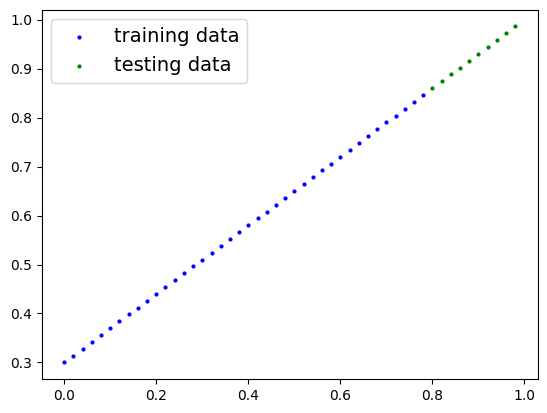

In [ ]:
plot_predictions();

# **what this model do:**
1 start with random value ( weights and bais )

2 look at training data and adjust the random values to better represent ( or get closer to) the ideal values ( the weights and bais values we used to create the data )


In [ ]:
# build model

# create linear regression model class

class LinearRegressionModel(nn.Module) :
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))


  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


**for building models we have to inheritant nn.module which is base class for every model and if we use this as base class then we have to overide forward method and write what we actually performing in partcular model**

# torch.optim
**it tells models parameter stored in nn.parameter to best change to improve gradient descent and in turn reduce the loss**

In [ ]:
# to check what model parameter have we use .parameter()

torch.manual_seed(42)
model_0 = LinearRegressionModel()  # making object
list(model_0.parameters()) # getting model's parameter

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameteres
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# making predictions using " torch.interference_mode()"
with torch.inference_mode():
  y_preds = model_0(x_test)
y_preds , y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

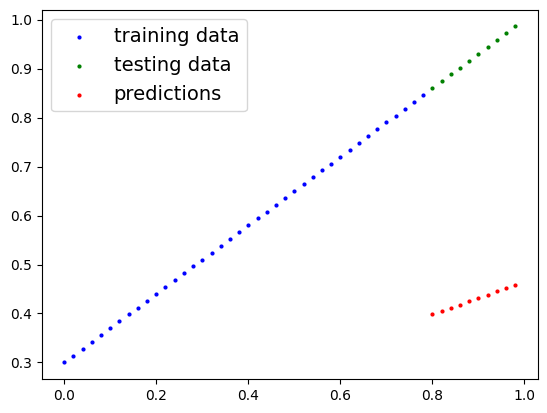

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
# train model

# we calculate the gradient of loss computation ( diff of y_preds and y_test )
# since gradient tells the direction and magnitude
# we use the gradient value to change the model parameter ( weights and bias )
# using optimizer
# here we move model parameter from unknown to known parameter
# loss computation = criterion = cost function = loss function




In [ ]:
loss_fn = nn.L1Loss() #  set up loss functions
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # learning rate
# small lr small changes in parameter and vice versa

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### **model.train()**
it is crucial during training in PyTorch because it activates the necessary behaviors in layers like Dropout and Batch Normalization. It ensures that gradients are computed for model parameters, and it enables specific training-related functionalities that help the model learn effectively and generalize well to new data.

In [ ]:

epochs = 200
# track different values
epoch_count = []
loss_values = []
test_loss_values = []
# training
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(x_train) # 1. forward pass
  loss = loss_fn(y_pred , y_train) # 2. loss
  optimizer.zero_grad() # 3. set to zero grad
  loss.backward() # 4. backpropagation to cal grad
  optimizer.step() # 5. change parameters of model
  #testing
  model_0.eval() # 6. turn off gradient tracking
  with torch.inference_mode():
    test_pred = model_0(x_test) # 1. forward pass
    test_loss = loss_fn(test_pred , y_test) # 2. cal loss
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch:{epoch} : loss:{loss} : test loss:{test_loss}")
    print(model_0.state_dict())


epoch:0 : loss:0.31288138031959534 : test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch:10 : loss:0.1976713240146637 : test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch:20 : loss:0.08908725529909134 : test loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch:30 : loss:0.053148526698350906 : test loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch:40 : loss:0.04543796554207802 : test loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch:50 : loss:0.04167863354086876 : test loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch:60 : loss:0.03818932920694351 : test loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
epoch:70 : loss

In [ ]:
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

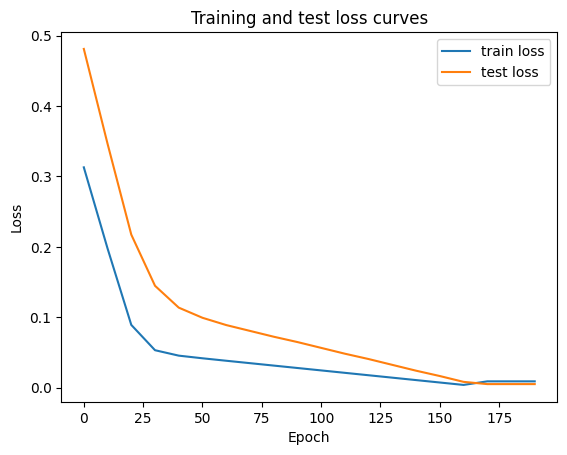

In [ ]:
plt.plot(epoch_count , np.array(torch.tensor(loss_values).numpy()) , label="train loss")
plt.plot(epoch_count , test_loss_values , label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


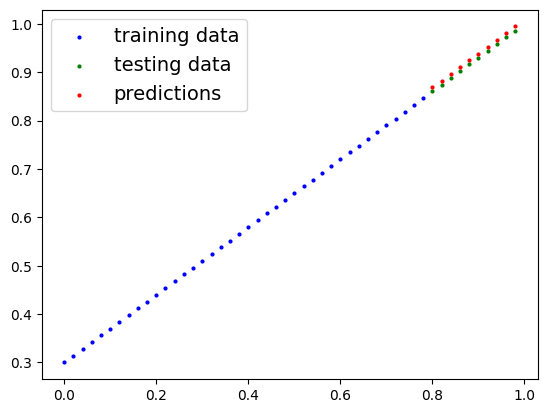

In [ ]:
print(model_0.state_dict())
with torch.inference_mode():
  y_preds = model_0(x_test)
plot_predictions(predictions = y_preds)

## saving a model in pytorch

there are main 3 methods for saving and loading models

1. torch.save()
   -> allows to save a pytorch object in python's piickle format

the pickle module implements binary protocols for serializing and de-serializing a Python object structure.

2. torch.load()
  -> allows to load saved pytorch object

3. torch.nn.module.load_state_dict()
  -> loads a model's saved state dictionary



In [ ]:
# saving our pytorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True , exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. saving the model

torch.save(obj=model_0.state_dict() , f=MODEL_SAVE_PATH) # here torch.save creates the file itself so we dont have to explicitly create it

In [ ]:
!ls -1 models

01_pytorch_workflow_model_0.pth


since we saved model's state dict ( a model's parameter so on) so we make new object of model's class and load the saved state_dict into that

In [ ]:
models_1 = LinearRegressionModel() # making new obj and here we load a saved state dict
print(models_1.state_dict()) # initially model's parameter value are


OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])


In [ ]:
models_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(models_1.state_dict()) # here we updated model state dict

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [ ]:
models_1.eval()
with torch.inference_mode():
  loaded_model_preds = models_1(x_test)
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting all together

In [ ]:
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from torch import nn
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device:{device}")

device:cpu


# Data

In [ ]:
weight = 0.7
bias = 0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = bias + X * weight
X_split = int(0.8 * len(X))
X_train , y_train = X[:X_split] , y[:X_split]
X_test , y_test = X[X_split:] , y[X_split:]
X_train , y_train , X_test , y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

# Visualization

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.scatter(train_data , train_labels , c="b" , s=4 , label="training data")
  plt.scatter(test_data , test_labels , c="g" , s=4 , label="testing data")
  if predictions is not None:
    plt.scatter(test_data , predictions , c="r" , s=4 , label="predictions")
  plt.legend()

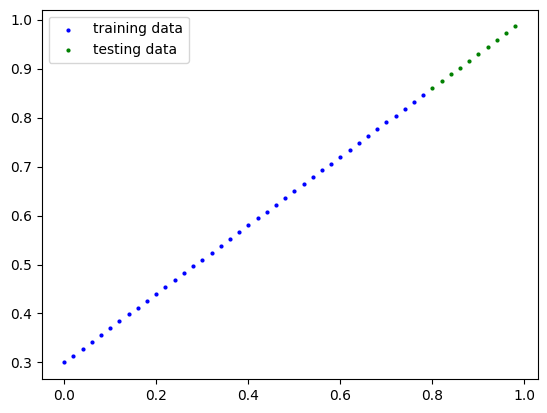

In [ ]:
plot_predictions();

# Model

In [ ]:
class LinearRegressionModel_V2(nn.Module):
  def __init__(self):
    super().__init__()
    # using nn.Linear() for creating model parameter
    self.linear_layer = nn.Linear(in_features=1,
              out_features=1)
  # x:torch.Tensor -> torch.Tensor means x should be in torch tensor and
  # return in torch tensor
  def forward(self , x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


In [ ]:
model_01 = LinearRegressionModel_V2()
model_01.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8815]])),
             ('linear_layer.bias', tensor([-0.7336]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_01.parameters(),lr=0.01)

# Training and testing

In [ ]:
torch.manual_seed(42)
epochs = 400
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
  model_01.train()
  y_pred = model_01(X_train)
  loss = loss_fn(y_pred , y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_01.eval()
  with torch.inference_mode():
    test_pred = model_01(X_test)
    test_loss = loss_fn(test_pred , y_test)
  if epoch% 10 == 0 :
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch:{epoch} : loss:{loss} : test loss:{test_loss}")

epoch:0 : loss:0.9628263711929321 : test loss:0.858583927154541
epoch:10 : loss:0.8476165533065796 : test loss:0.7238741517066956
epoch:20 : loss:0.732406735420227 : test loss:0.5891643166542053
epoch:30 : loss:0.6171968579292297 : test loss:0.4544544219970703
epoch:40 : loss:0.5019866824150085 : test loss:0.3197440505027771
epoch:50 : loss:0.3867765963077545 : test loss:0.1850336492061615
epoch:60 : loss:0.2715663015842438 : test loss:0.05032316967844963
epoch:70 : loss:0.1586626023054123 : test loss:0.08102552592754364
epoch:80 : loss:0.11361626535654068 : test loss:0.15223388373851776
epoch:90 : loss:0.10002555698156357 : test loss:0.18380694091320038
epoch:100 : loss:0.0938224270939827 : test loss:0.19651523232460022
epoch:110 : loss:0.08965343236923218 : test loss:0.19862690567970276
epoch:120 : loss:0.08612529933452606 : test loss:0.19447574019432068
epoch:130 : loss:0.08259718865156174 : test loss:0.19032466411590576
epoch:140 : loss:0.07911241054534912 : test loss:0.18411302566

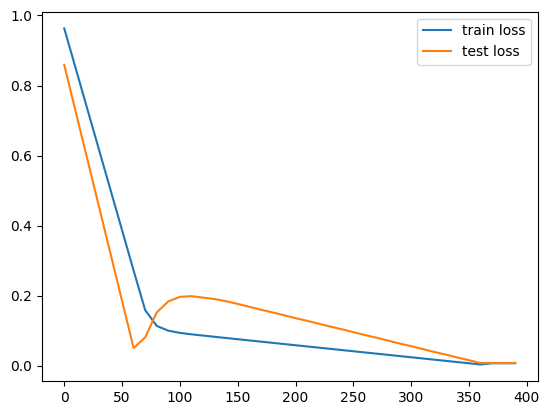

In [ ]:
plt.plot(epoch_count , np.array(torch.tensor(loss_values).numpy()) , label="train loss")
plt.plot(epoch_count , test_loss_values , label="test loss")
plt.legend()

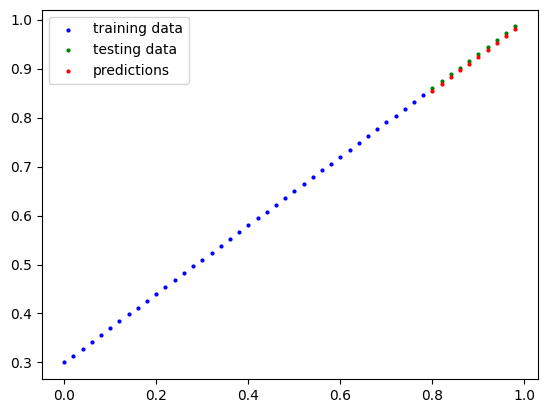

In [ ]:
with torch.inference_mode():
  pred = model_01(X_test)
plot_predictions(predictions= pred)

In [ ]:
model_01.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7028]])),
             ('linear_layer.bias', tensor([0.2919]))])

# Saving and Loading model

In [ ]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True , exist_ok = True)
MODEL_NAME = "01_Pytorch_workflow1.pth"
MODEL_SAVE_PATH_1 = MODEL_PATH / MODEL_NAME
torch.save(model_01.state_dict() , MODEL_SAVE_PATH_1)

In [ ]:
object_01 = LinearRegressionModel_V2()
object_01.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:

object_01.load_state_dict(torch.load(MODEL_SAVE_PATH_1))
object_01.state_dict()

with torch.inference_mode():
  object_01_pred = object_01(X_test)
  loss = loss_fn(object_01_pred , y_test)
print(loss)

tensor(0.0057)
